In [3]:
!pip install ccxt stable-baselines3 gymnasium

In [7]:
import yfinance as yf
import pandas as pd

# 2 saal ka daily BTC data
df = yf.download("BTC-USD", period="2y", interval="1d")
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.columns = ['open', 'high', 'low', 'close', 'volume']
df = df.dropna()
df = df.reset_index(drop=True)

print("Daily data loaded from yfinance")
print("Shape:", df.shape)  # ~730 rows
print("Date range:", df.index.min(), "to", df.index.max())
print(df.head())
print(df.tail())

/tmp/ipykernel_55/2222441944.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("BTC-USD", period="2y", interval="1d")
[*********************100%***********************]  1 of 1 completed

Daily data loaded from yfinance
Shape: (732, 5)
Date range: 0 to 731
           open          high           low         close       volume
0  41348.203125  42720.296875  40530.257812  42623.539062  25224642008
1  42641.511719  43354.296875  41826.335938  42270.527344  23171001281
2  42261.300781  44275.585938  42223.816406  43652.250000  27868908174
3  43648.125000  44240.667969  43330.050781  43869.152344  22452766169
4  43868.988281  44367.957031  43441.968750  43997.902344  21028503216
             open          high           low         close       volume
727  90296.437500  90498.109375  87634.937500  88175.179688  50465972205
728  88171.078125  89983.921875  85304.078125  86419.781250  45559514323
729  86424.406250  88170.093750  85381.687500  87843.984375  41262178223
730  87847.617188  90264.570312  85316.265625  86143.757812  44243392914
731  86196.789062  86999.648438  85871.429688  86831.976562  44534448128


In [ ]:
import pandas as pd
import numpy as np

def add_technical_indicators(df):
    df = df.copy()
    df['MA10'] = df['close'].rolling(10).mean()
    df['MA50'] = df['close'].rolling(50).mean()
    df['EMA12'] = df['close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    delta = df['close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['BB_middle'] = df['close'].rolling(20).mean()
    bb_std = df['close'].rolling(20).std()
    df['BB_upper'] = df['BB_middle'] + (bb_std * 2)
    df['BB_lower'] = df['BB_middle'] - (bb_std * 2)
    df['volume_sma20'] = df['volume'].rolling(20).mean()
    return df

df = add_technical_indicators(df)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print("Indicators added, shape:", df.shape)

Indicators added, shape: (683, 16)


2025-12-18 09:22:03.905743: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766049724.086279      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766049724.138984      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766049724.577937      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766049724.577977      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766049724.577980      55 computation_placer.cc:177] computation placer alr

X_train shape: (498, 60, 13)
X_test shape: (125, 60, 13)


I0000 00:00:1766049736.012215      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100


I0000 00:00:1766049740.467487     165 cuda_dnn.cc:529] Loaded cuDNN version 91002


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.1201 - val_loss: 0.0225
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0185 - val_loss: 0.0124
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - val_loss: 0.0136
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0097 - val_loss: 0.0103
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0072 - val_loss: 0.0064
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0069 - val_loss: 0.0058
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0068 - val_loss: 0.0058
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0074 - val_loss: 0.0065
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0071 - val_loss: 0.0085
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0070 - val_loss: 0.0058
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0

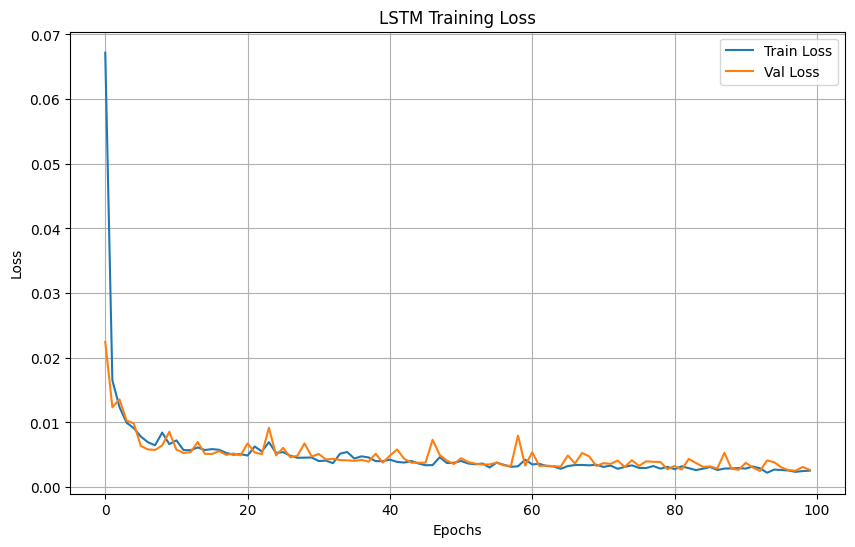

LSTM Model saved as btc_lstm_predictor.keras
Scaler saved as btc_scaler.pkl
Final val loss: 0.002511823084205389


In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pickle  # Scaler save karne ke liye

# Features (same as before)
feature_columns = ['close', 'volume', 'MA10', 'MA50', 'EMA12', 'EMA26',
                   'MACD', 'MACD_signal', 'RSI', 'BB_middle', 'BB_upper',
                   'BB_lower', 'volume_sma20']
data = df[feature_columns].values

# Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Save scaler for later use in hybrid env
with open('btc_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Sequences
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

# Plot loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('LSTM Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Save model with .keras extension
model.save("btc_lstm_predictor.keras")
print("LSTM Model saved as btc_lstm_predictor.keras")

# Save scaler too
with open('btc_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved as btc_scaler.pkl")

print("Final val loss:", min(history.history['val_loss']))

In [10]:
from tensorflow.keras.models import load_model
import pickle

lstm_model = load_model("btc_lstm_predictor.keras")
with open('btc_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

feature_columns = ['close', 'volume', 'MA10', 'MA50', 'EMA12', 'EMA26',
                   'MACD', 'MACD_signal', 'RSI', 'BB_middle', 'BB_upper',
                   'BB_lower', 'volume_sma20']

def get_predicted_return(idx):
    if idx < 60:
        return 0.0
    start = idx - 60
    sequence = df[feature_columns].iloc[start:idx].values
    scaled = scaler.transform(sequence)
    scaled = scaled.reshape(1, 60, 13)
    pred_scaled = lstm_model.predict(scaled, verbose=0)[0][0]
    dummy = np.zeros((1, 13))
    dummy[0, 0] = pred_scaled
    pred_price = scaler.inverse_transform(dummy)[0, 0]
    current_price = df.iloc[idx]['close']
    return (pred_price - current_price) / current_price if current_price > 0 else 0.0

print("Pre-computing LSTM predictions... (thoda time lagega)")
df['lstm_pred_return'] = [get_predicted_return(i) for i in range(len(df))]
df['lstm_pred_return'] = df['lstm_pred_return'].fillna(0)

print("LSTM predictions pre-computed and added as 'lstm_pred_return'")
print(df[['close', 'lstm_pred_return']].tail(10))

Pre-computing LSTM predictions... (thoda time lagega)
LSTM predictions pre-computed and added as 'lstm_pred_return'
            close  lstm_pred_return
673  92691.710938         -0.010847
674  92020.945312         -0.002919
675  92511.335938         -0.008322
676  90270.414062          0.015376
677  90298.710938          0.013790
678  88175.179688          0.035759
679  86419.781250          0.051145
680  87843.984375          0.027922
681  86143.757812          0.039594
682  86831.976562          0.019320


In [15]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
from stable_baselines3.common.vec_env import DummyVecEnv

class HybridBitcoinFuturesEnv(gym.Env):
    def __init__(self, df, initial_balance=10000, leverage=5, fee_rate=0.0004, lookback=60):
        super().__init__()
        self.df = df.reset_index(drop=True)
        self.initial_balance = initial_balance
        self.balance = initial_balance
        self.leverage = leverage
        self.fee_rate = fee_rate
        self.lookback = lookback
        self.current_step = lookback
        self.max_steps = len(df) - 1  # Safe limit
        
        self.action_space = spaces.Discrete(3)
        
        num_features = len(df.columns)
        total_obs_size = lookback * num_features + 4
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(total_obs_size,), dtype=np.float32)
    
    def reset(self, seed=None):
        super().reset(seed=seed)
        self.balance = self.initial_balance
        self.position = 0
        self.entry_price = 0
        self.current_step = self.lookback
        return self._get_obs(), {}
    
    def _get_obs(self):
        # Safe current_step
        safe_step = min(self.current_step, len(self.df) - 1)
        
        start = max(0, safe_step - self.lookback)
        end = safe_step
        window = self.df.iloc[start:end].values.flatten()
        
        expected_window_size = self.lookback * len(self.df.columns)
        if len(window) < expected_window_size:
            last_row = self.df.iloc[-1].values
            padding_size = expected_window_size - len(window)
            padding = np.tile(last_row, (padding_size // len(last_row) + 1))[:padding_size]
            window = np.concatenate([window, padding])
        
        unreal_pnl = self._unrealized_pnl() if self.position != 0 else 0.0
        pred_return = float(self.df.iloc[safe_step]['lstm_pred_return'])
        
        extra = np.array([
            self.balance / self.initial_balance,
            float(self.position),
            unreal_pnl,
            pred_return
        ], dtype=np.float32)
        
        obs = np.concatenate([window.astype(np.float32), extra])
        return obs
    
    def _unrealized_pnl(self):
        if self.position == 0:
            return 0.0
        safe_step = min(self.current_step, len(self.df) - 1)
        price = self.df.iloc[safe_step]['close']
        if self.position == 1:
            return (price - self.entry_price) / self.entry_price * self.leverage
        else:
            return (self.entry_price - price) / self.entry_price * self.leverage
    
    def step(self, action):
        # Safe current_step for price
        safe_step = min(self.current_step, len(self.df) - 1)
        price = self.df.iloc[safe_step]['close']
        reward = 0.0
        
        target_pos = {0: 0, 1: 1, 2: -1}[action]
        
        if target_pos != self.position and self.position != 0:
            pnl = self._unrealized_pnl() * self.balance
            fee = abs(pnl) * self.fee_rate * 2
            self.balance += pnl - fee
            reward += pnl - fee
        
        if target_pos != 0 and self.position != target_pos:
            self.position = target_pos
            self.entry_price = price
            fee = self.balance * self.fee_rate
            self.balance -= fee
            reward -= fee
        else:
            self.position = target_pos
        
        if self.position != 0:
            reward += self._unrealized_pnl() * self.balance * 0.01
        
        self.current_step += 1
        done = self.current_step >= self.max_steps or self.balance <= 100
        
        return self._get_obs(), reward, done, False, {'balance': self.balance}

# Create env
env_hybrid = HybridBitcoinFuturesEnv(df, leverage=5)
env_hybrid = DummyVecEnv([lambda: env_hybrid])

print("FINAL Hybrid Environment – No more index errors!")
print("Observation shape:", env_hybrid.observation_space.shape[0])

FINAL Hybrid Environment – No more index errors!
Observation shape: 1024


Using cuda device
FINAL TRAINING – 300,000 timesteps (safe & fast)
----------------------------
| time/              |     |
|    fps             | 582 |
|    iterations      | 1   |
|    time_elapsed    | 0   |
|    total_timesteps | 128 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 485           |
|    iterations           | 2             |
|    time_elapsed         | 0             |
|    total_timesteps      | 256           |
| train/                  |               |
|    approx_kl            | 4.7019683e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.1          |
|    explained_variance   | 6.699562e-05  |
|    learning_rate        | 0.0005        |
|    loss                 | 1.16e+07      |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.00192      |
|    value_loss           

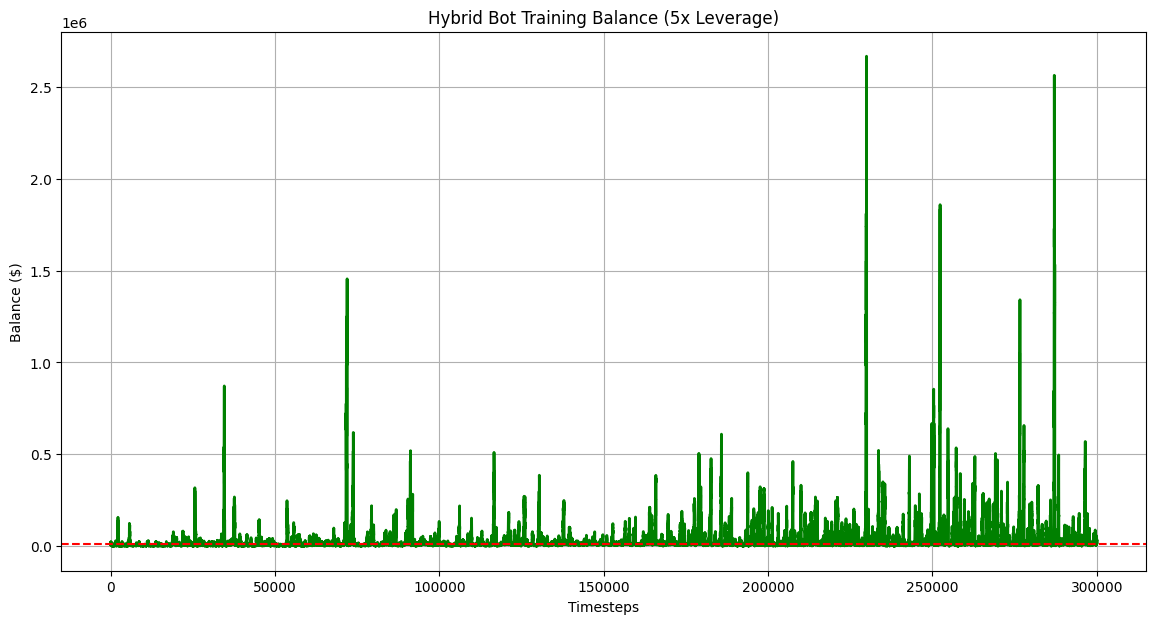

Training Complete! Final Balance: $14421.43
Return: +44.21%


In [16]:
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
import matplotlib.pyplot as plt

class BalanceCallback(BaseCallback):
    def __init__(self):
        super().__init__()
        self.balances = []
        self.steps = []
    def _on_step(self):
        self.balances.append(self.locals['infos'][0]['balance'])
        self.steps.append(self.num_timesteps)
        return True

callback = BalanceCallback()

model_hybrid = PPO("MlpPolicy", env_hybrid, verbose=1, learning_rate=5e-4, n_steps=128)

print("FINAL TRAINING – 300,000 timesteps (safe & fast)")
model_hybrid.learn(total_timesteps=300000, callback=callback)

model_hybrid.save("btc_hybrid_final_300k")

plt.figure(figsize=(14,7))
plt.plot(callback.steps, callback.balances, color='green', linewidth=2)
plt.title("Hybrid Bot Training Balance (5x Leverage)")
plt.xlabel("Timesteps")
plt.ylabel("Balance ($)")
plt.axhline(10000, color='red', linestyle='--')
plt.grid()
plt.show()

final_bal = callback.balances[-1] if callback.balances else 10000
print(f"Training Complete! Final Balance: ${final_bal:.2f}")
print(f"Return: {((final_bal - 10000)/10000)*100:+.2f}%")

=== FULL BACKTEST RESULT (Daily Data, 5x Leverage) ===
Initial Balance: $10,000
Final Balance: $1437308.90
Total Return: +14273.09%


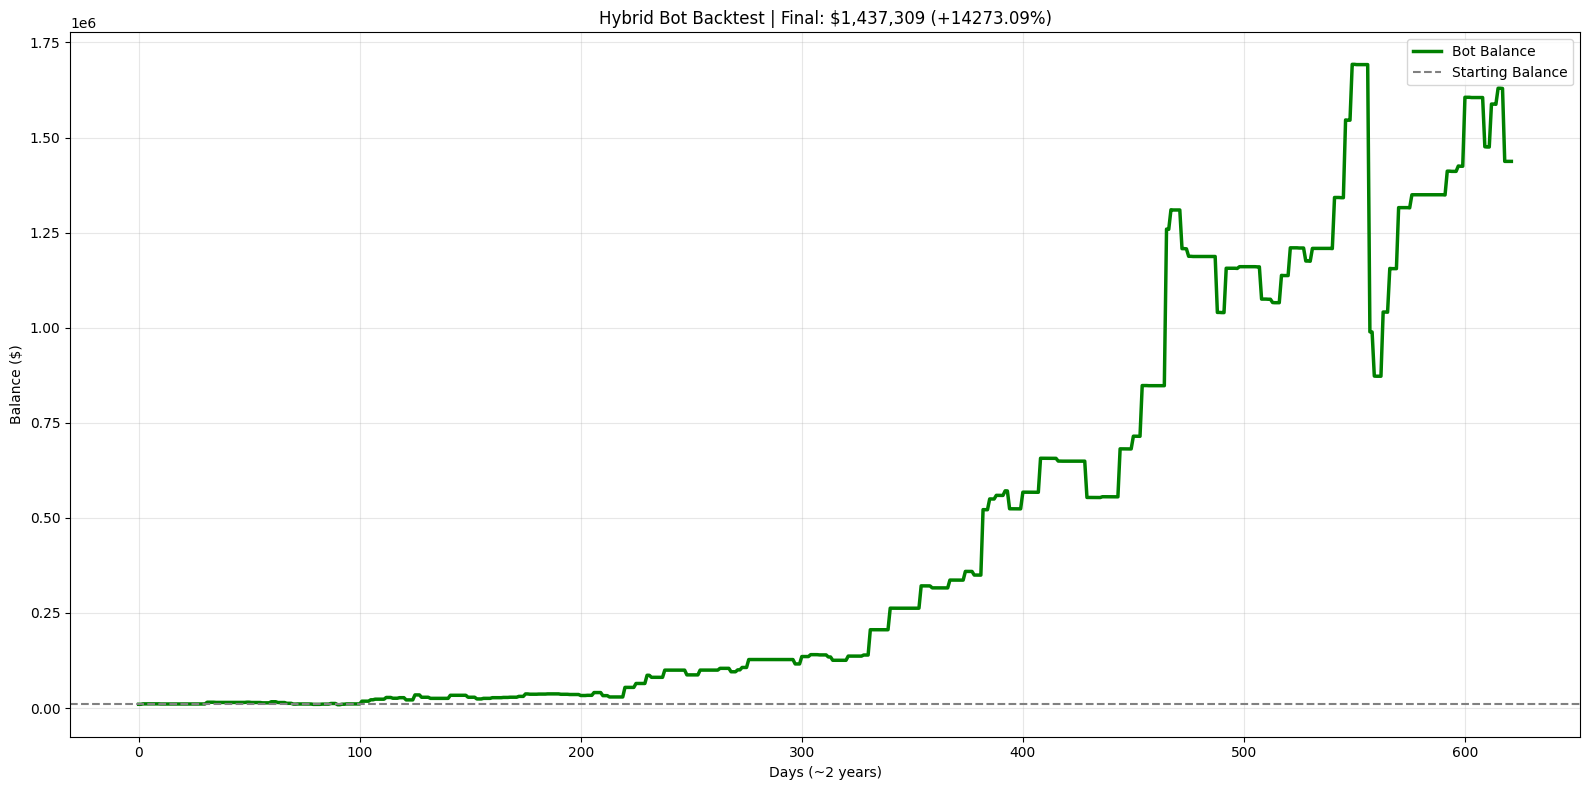


Action Distribution:
Hold: 359 times (57.7%)
Long: 263 times (42.3%)


In [18]:
# Backtest again with fix
test_env = HybridBitcoinFuturesEnv(df, initial_balance=10000, leverage=5)
obs, _ = test_env.reset()
done = False

balances = []
actions = []
steps = []

step = 0
balances.append(10000)  # Starting balance

while not done:
    action, _ = model_hybrid.predict(obs, deterministic=True)
    obs, reward, done, _, info = test_env.step(int(action))
    
    balances.append(info['balance'])
    actions.append(int(action))
    steps.append(step)
    
    step += 1

final_balance = balances[-1]
total_return = (final_balance - 10000) / 10000 * 100

print("=== FULL BACKTEST RESULT (Daily Data, 5x Leverage) ===")
print(f"Initial Balance: $10,000")
print(f"Final Balance: ${final_balance:.2f}")
print(f"Total Return: {total_return:+.2f}%")

# Plot - fixed
plt.figure(figsize=(16,8))
plt.plot(steps, balances[1:], label='Bot Balance', color='green', linewidth=2.5)  # balances[1:] to match steps
plt.axhline(10000, color='gray', linestyle='--', label='Starting Balance')
plt.title(f'Hybrid Bot Backtest | Final: ${final_balance:,.0f} ({total_return:+.2f}%)')
plt.xlabel('Days (~2 years)')
plt.ylabel('Balance ($)')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Action distribution
unique, counts = np.unique(actions, return_counts=True)
action_map = {0: 'Hold', 1: 'Long', 2: 'Short'}
print("\nAction Distribution:")
for a, c in zip(unique, counts):
    print(f"{action_map.get(a, 'Unknown')}: {c} times ({c/len(actions)*100:.1f}%)")